## 4.9 - Intro to Data Visualization with Python

- Create basic visualizations with Python
- Create representative data samples to avoid memory when executing code

## Importing Libraries (New visualization libraries)

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
#Create path shortcut
path = r'/Users/puneet/Desktop/Instacart Basket Analysis 08-2025'

In [4]:
#Insert dataset
ords_prods_merge = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_merge_E48.pkl'))

In [5]:
#Test new dataframe
ords_prods_merge.head(2)

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,spending_flag,spender_type,median_flag,customer_frequency
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Mid range product,Regularly busy,Regular days,Average hours,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
1,2539329,1,1,2,8,NaN,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Mid range product,Regularly busy,Regular days,Average hours,10,New customer,6.367797,Low spender,20.5,Non-frequent customer


## -

## Creating Bar Charts

Bar chart code:
- df['column'].value_counts().plot.bar()

<Axes: xlabel='orders_day_of_the_week'>

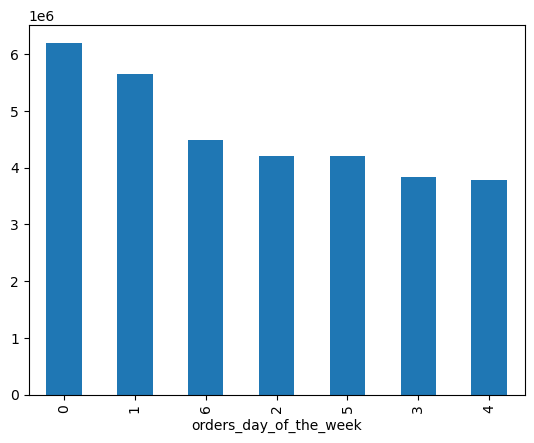

In [6]:
#Create bar chart
ords_prods_merge['orders_day_of_the_week'].value_counts().plot.bar()

Bar chart automatically sorted by smallest to largest values

*Sort by x-axis instead (index order)*

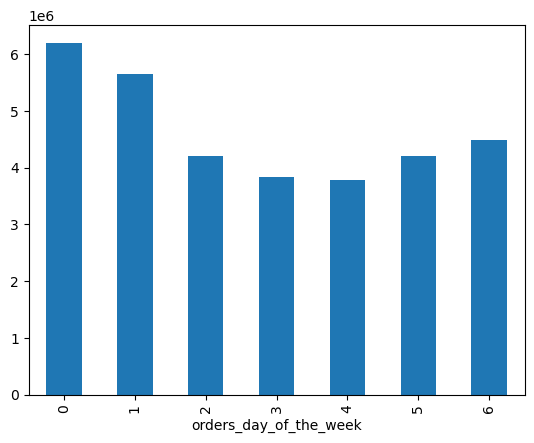

In [9]:
#Bar chart sorted by column index
bar = ords_prods_merge['orders_day_of_the_week'].value_counts().sort_index().plot.bar()

Same thing can be done with lists, down below

In [10]:
#List of days of the weeks value frequency
ords_prods_merge['orders_day_of_the_week'].value_counts()

orders_day_of_the_week
0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: count, dtype: int64

In [11]:
#List of days of the weeks value frequency, but by index, not largest to smallest
ords_prods_merge['orders_day_of_the_week'].value_counts().sort_index()

orders_day_of_the_week
0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: count, dtype: int64

*You can add color to the chart as well*

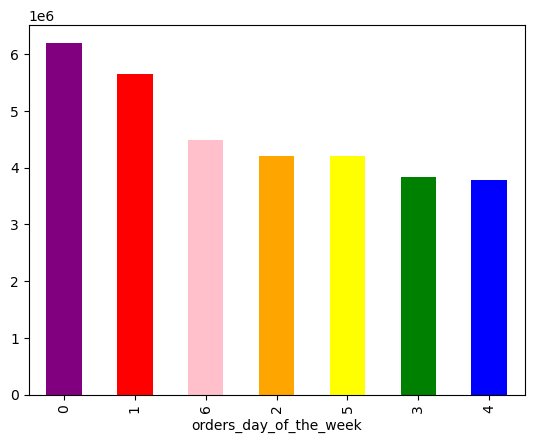

In [15]:
#Adding color to bar chart
bar = ords_prods_merge['orders_day_of_the_week'].value_counts().plot.bar(color = ['purple','red','pink','orange','yellow','green','blue'])

## -

## Exporting Charts

Exporting code is similar to that of csv and pkl files

In [18]:
#Export "bar" created above
bar.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations','bar_orders_dow.png'))

## -

## Creating Histograms and Scatterplots

#### Histogram of 'Prices' column

<Axes: ylabel='Frequency'>

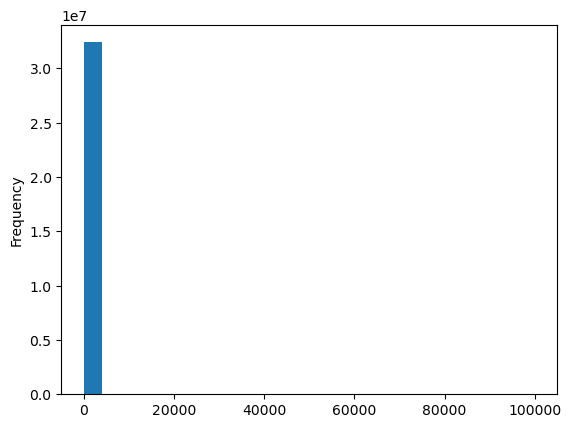

In [19]:
#Histogram example
ords_prods_merge['prices'].plot.hist(bins=25)

Why only one column? Let's check the data again....

In [20]:
ords_prods_merge['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

Check each individual stat....

In [21]:
ords_prods_merge['prices'].mean()

np.float64(11.980225638383445)

In [22]:
ords_prods_merge['prices'].median()

7.4

In [23]:
ords_prods_merge['prices'].max()

99999.0

While the mean and median are between 7 and 12 (relatively realistic), the max value yields a strange result. How could an item cost $99,999.00? This must be the result of data corruption or some kind of special value within the data. This is also what’s breaking your histogram—having most values between 7 and 12 (see the median and mean again) but an extreme value of 99,999 is forcing your histogram to shove all the small values into one bar and the extreme value in another one. And this second bar is so tiny that you can’t even see it on the chart. Hence, the one-column histogram you saw above.

#### Create Scatterplot

Create scatterplot to do more exploratory data analysis
- check for outliers
- plotting 'prices' against itself on x and y axis

<Axes: xlabel='prices', ylabel='prices'>

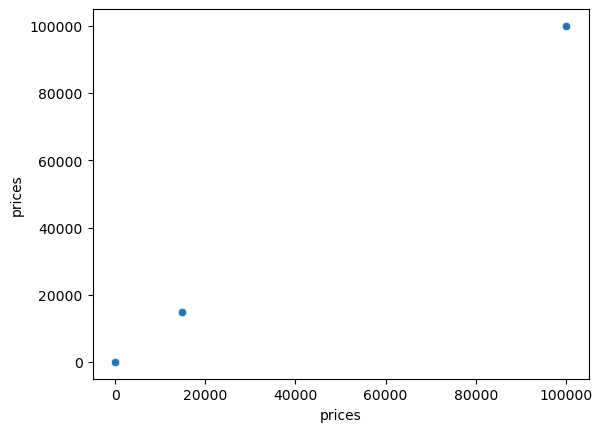

In [24]:
#Create scatterplot
sns.scatterplot(x = 'prices', y = 'prices', data = ords_prods_merge)

We see most values fall within the 7-12 data range. But what about the outliers around 20K an 100K?
 - More analysis is needed

In [28]:
#Check values above "normal" threshold
ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,order_id,user_id,order_number,orders_day_of_the_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,spending_flag,spender_type,median_flag,customer_frequency
1576,912404,17,12,2,14,5.0,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,...,High range product,Regularly busy,Regular days,Busiest hours,40,Regular customer,108.648299,High spender,5.0,Frequent customer
1638,603376,17,22,6,16,4.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,High range product,Regularly busy,Regular days,Busiest hours,40,Regular customer,108.648299,High spender,5.0,Frequent customer
16522,3264360,135,2,2,21,13.0,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,...,High range product,Regularly busy,Regular days,Average hours,4,New customer,1154.792308,High spender,12.0,Regular customer
16528,892534,135,3,0,8,12.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,High range product,Busiest day,Busiest days,Average hours,4,New customer,1154.792308,High spender,12.0,Regular customer
53672,229704,342,8,1,19,30.0,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,...,High range product,Regularly busy,Busiest days,Average hours,16,Regular customer,114.426619,High spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32320511,3172853,205650,18,1,9,7.0,21553,17,1,Lowfat 2% Milkfat Cottage Cheese,...,High range product,Regularly busy,Busiest days,Busiest hours,25,Regular customer,351.141618,High spender,6.0,Frequent customer
32347717,2504315,205818,3,5,15,3.0,21553,13,0,Lowfat 2% Milkfat Cottage Cheese,...,High range product,Regularly busy,Regular days,Busiest hours,25,Regular customer,170.073770,High spender,13.0,Regular customer
32347727,1108388,205818,5,4,5,1.0,21553,5,1,Lowfat 2% Milkfat Cottage Cheese,...,High range product,Least busy,Slowest days,Slowest hours,25,Regular customer,170.073770,High spender,13.0,Regular customer
32380527,1916142,206049,1,2,17,NaN,21553,2,0,Lowfat 2% Milkfat Cottage Cheese,...,High range product,Regularly busy,Regular days,Average hours,5,New customer,938.031250,High spender,7.0,Frequent customer


From the output, you can see that there are 5,127 rows with outlier observations (prices greater than 100). In addition, at the top of the “prices” column, you can see that there’s another odd value, 14,900.00, which corresponds to the second unexplainable point in the scatterplot. Following this is the 99,999.00 you identified previously. As such, you can assume that it’s the 14,900.00 and 99,999.00 values that are skewing your charts.

- For now, let's turn those values over 100 in prices into "NaNs". NaN is in the numpy library to signify missing values

In [31]:
#Turn large values over 100 into NaN values
ords_prods_merge.loc[ords_prods_merge['prices'] > 100, 'prices'] = np.nan

In [32]:
#Check max value now
ords_prods_merge['prices'].max()

25.0

*Outliers have been removed*

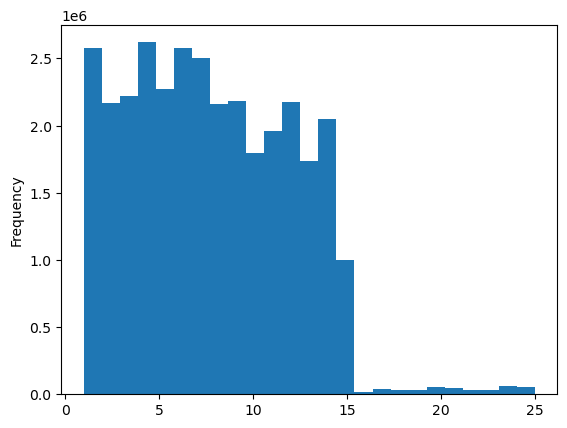

In [36]:
#Try histogram example again:
hist = ords_prods_merge['prices'].plot.hist(bins=25)

Increase granulairty level in histogram, for more thiner columns

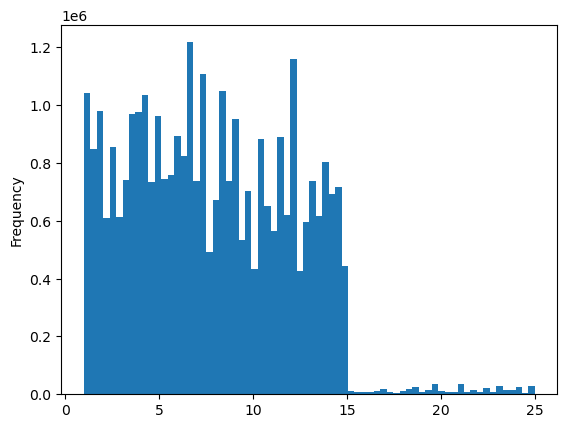

In [37]:
#Change bins size to 70
hist_2 = ords_prods_merge['prices'].plot.hist(bins = 70)

### Exporting Histogram Visualization

In [39]:
#Exporting Histogram (Exact same as bar)
hist_2.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'hist_prices.png'))

## -

## Creating Line Charts

- Create line chart using prices across days of the week
- First need subst df because line chart eould crash with too many row values

In [42]:
#Create 2M row subset?
df = ords_prods_merge[:2000000]

The above won't work because it's not a random distribution sample
- Need to collect a better/representative sample
- 70/30 or 80/20 split is good, and should be compared
- Need to creat a dloting numer 0-1 that represents 100% of the df
- Anything above .7 vs. under .7 placed

In [44]:
#Create random distribution
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

The seed is set via the NumPy function random.seed(). We’ve set the seed to 4 for now. Feel free to do so as you follow along to ensure you’re using the same random pattern of numbers as in the examples. Then, in the second line of the command, you create a new list called dev. This will be what stores your boolean values—you’ll be getting an output of True or False for every value based on whether it’s less than or equal to 0.7:

Within the brackets of this function, you’ll see len(ords_prods_merge). This len() produces a value that represents the length of whatever you put inside it. By passing your dataframe, you’ll receive an output of 32,404,859, which is how many rows are in your dataframe.

In [45]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [48]:
#10 radnom number between 0-1
np.random.rand(10)

array([0.0164016 , 0.99588525, 0.68895442, 0.9491469 , 0.63012328,
       0.9192488 , 0.87788077, 0.3936537 , 0.64745848, 0.73786691])

In [49]:
#Length of dataframe, which we split into above in random values
len(ords_prods_merge)

32404859

So, to recap each piece of the split code, you need to:

1. Set the seed for the random number generator.
2. Create 32,404,859 random numbers (the length of your ords_prods_merge dataframe) ranging between 0 and 1.
3. Code a logical test comparing each of those numbers to a value of 0.7 (either less than or greater than 0.7).
4. Store the results of the test in a new list, dev, in the form of boolean values (True and False).

In [50]:
#Split the list into 2 samples
big = ords_prods_merge[dev]
small = ords_prods_merge[~dev]

- Big represents the larger 70% sample from the 'dev' sample we created
- Small represents the the false 30% from the 'dev'sample

The tilde you see in the second line negates the argument, in other words, it stores everything that’s not dev, or False.

In [55]:
#Test the length of the new samples, theoretically should add up to the same rows
len(ords_prods_merge)

32404859

In [54]:
#Length size of samples
len(big) + len(small)

32404859

In [56]:
#Last step is to create subset with only the columns we want
df_2 = small[['orders_day_of_the_week','prices']]

## Line Charts

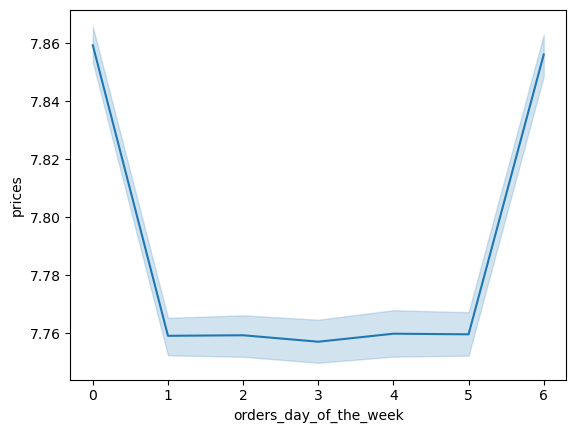

In [60]:
#Line Chart syntax
line = sns.lineplot(data = df_2, x = 'orders_day_of_the_week', y = 'prices')

sns.lineplot() is line graph syntax

In [62]:
ords_prods_merge.dtypes

order_id                     int64
user_id                      int64
order_number                 int64
orders_day_of_the_week       int64
order_hour_of_day            int64
days_since_prior_order     float64
product_id                   int64
add_to_cart_order            int64
reordered                    int64
product_name                object
aisle_id                     int64
department_id                int64
prices                     float64
_merge                    category
price_range_loc             object
busiest_day                 object
busiest_days                object
busiest_period_of_day       object
max_order                    int64
loyalty_flag                object
spending_flag              float64
spender_type                object
median_flag                float64
customer_frequency          object
dtype: object